In [1]:
import numpy as np
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
# 1. Load the dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
# 2. Normalize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
# 3. Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Output: price (regression)
])

C:\Users\Anushka\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 4. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [6]:
# 5. Train the model
history = model.fit(x_train, y_train, epochs=120, batch_size=32,
                    validation_split=0.2, verbose=0)


In [7]:
# 6. Evaluate the model
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test MAE (Mean Absolute Error): ${mae * 1000:.2f}")

Test MAE (Mean Absolute Error): $2865.96


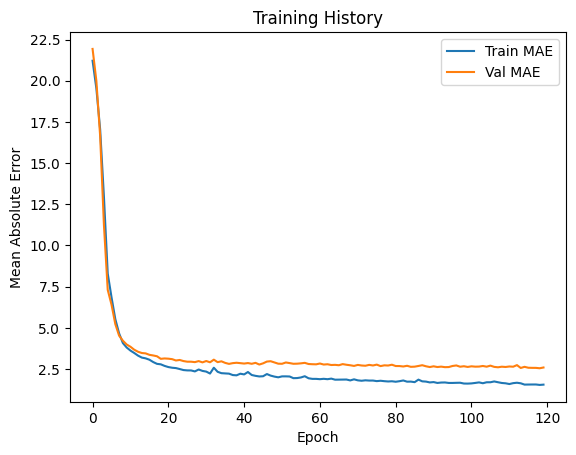

In [8]:
# 7. Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training History')
plt.legend()
plt.show()

In [11]:
# 8. Predict example
sample = x_test[5].reshape(1, -1)
predicted_price = model.predict(sample)[0][0]
print(f"Predicted price: ${predicted_price * 1000:.2f}")
print(f"Actual price:    ${y_test[5] * 1000:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted price: $22445.12
Actual price:    $24500.00
